Adım 1: Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
!pip install librosa
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install keras
!pip install tensorflow


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Input, LayerNormalization, MultiHeadAttention
from keras.callbacks import EarlyStopping

Adım 2: Verilerin Yüklenmesi ve Ön İşleme

In [ ]:
# Veri setlerinin dosya yollarını belirleyin
datasets = {
    'sad': '/content/sad.csv',
    'happy': '/content/happy.csv',
    'calm': '/content/calm.csv',
    'angry': '/content/angry.csv'
}

# Her veri setini yükleyip sütun adlarını kontrol etme
for emotion, file_path in datasets.items():
    df = pd.read_csv(file_path)
    print(f"Veri seti: {emotion}")
    print(df.head())
    print(df.columns)
    print(f"Null değer sayısı: \n{df.isnull().sum()}")
    print("\n")


Veri seti: sad
   id               name  pcm_loudness_sma_maxPos  pcm_loudness_sma_minPos  \
0   1   1157_hl_acik.wav                 0.576087                 0.902174   
1   2   1157_hl_algi.wav                 0.598039                 0.019608   
2   3  1157_hl_beste.wav                 0.461539                 0.028846   
3   4   1157_hl_bugu.wav                 0.372549                 0.176471   
4   5    1157_hl_cay.wav                 0.500000                 0.044118   

   pcm_loudness_sma_amean  pcm_loudness_sma_linregc1  \
0                0.159915                  -0.001001   
1                0.228054                  -0.000826   
2                0.207706                   0.002067   
3                0.225554                  -0.000414   
4                0.210066                   0.002469   

   pcm_loudness_sma_linregc2  pcm_loudness_sma_linregerrA  \
0                   0.205478                     0.119813   
1                   0.269755                     0.158775

In [ ]:
# Veriyi yükleme ve ön işleme
X, y = [], []
for emotion, file_path in datasets.items():
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        features = df.drop(columns=['name']).values  # 'name' sütununu çıkar
        labels = [emotion] * len(df)
        X.append(features)
        y.append(labels)
    else:
        print(f"Hata: {file_path} bulunamadı!")

X = np.vstack(X)
y = np.concatenate(y)

# Normalizasyon
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Etiketleri sayısal hale getirme
le = LabelEncoder()
y = le.fit_transform(y)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Early stopping ayarı
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [ ]:
# Veri setinin yüklenmesi
df_sad = pd.read_csv('/sad.csv')
df_happy = pd.read_csv('/happy.csv')
df_calm = pd.read_csv('/calm.csv')
df_angry = pd.read_csv('/angry.csv')

# Her sınıftaki örnek sayısını kontrol etme
print(f"Sad: {len(df_sad)}")
print(f"Happy: {len(df_happy)}")
print(f"Calm: {len(df_calm)}")
print(f"Angry: {len(df_angry)}")


Sad: 483
Happy: 357
Calm: 408
Angry: 487


3. Adım: Model Geliştirme ve Değerlendirme

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Veriyi yeniden şekillendirmeye gerek yok, çünkü özellikler zaten 1 boyutlu

# CNN Modeli oluştur
model_cnn = Sequential()
model_cnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(len(le.classes_), activation='softmax'))

# Modeli derle
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
model_cnn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2640 - loss: 1.3922 - val_accuracy: 0.3660 - val_loss: 1.3558
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3279 - loss: 1.3652 - val_accuracy: 0.4006 - val_loss: 1.3399
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3543 - loss: 1.3515 - val_accuracy: 0.4063 - val_loss: 1.3231
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3620 - loss: 1.3320 - val_accuracy: 0.4294 - val_loss: 1.3026
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3911 - loss: 1.3090 - val_accuracy: 0.4294 - val_loss: 1.2838
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3681 - loss: 1.3238 - val_accuracy: 0.4207 - val_loss: 1.2687
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3950 - loss: 1.2860 - val_accuracy: 0.4352 - val_loss: 1.2522
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3793 - loss: 1.2826 - val_accuracy: 0.4380 - val_loss: 1.2433
Epo

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


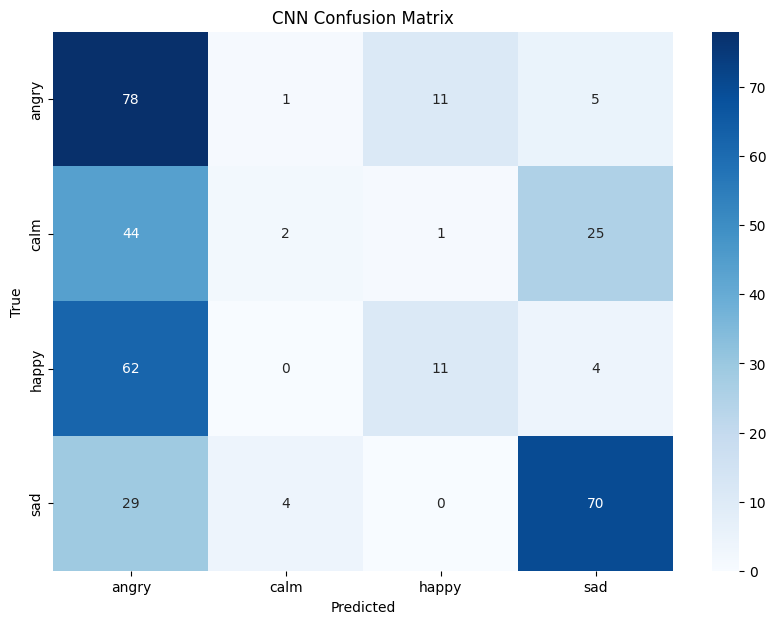

CNN Model Classification Report:
              precision    recall  f1-score   support

       angry       0.37      0.82      0.51        95
        calm       0.29      0.03      0.05        72
       happy       0.48      0.14      0.22        77
         sad       0.67      0.68      0.68       103

    accuracy                           0.46       347
   macro avg       0.45      0.42      0.36       347
weighted avg       0.47      0.46      0.40       347



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# CNN Model Performans Değerlendirme
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Confusion Matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

# Diğer performans metrikleri
print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=le.classes_))


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# LSTM Modeli oluştur
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(len(le.classes_), activation='softmax'))

# Modeli derle
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
model_lstm.fit(X_train_lstm, y_train, epochs=50, validation_data=(X_test_lstm, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3088 - loss: 1.3769 - val_accuracy: 0.3458 - val_loss: 1.3457
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3919 - loss: 1.3189 - val_accuracy: 0.3804 - val_loss: 1.3026
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4048 - loss: 1.2732 - val_accuracy: 0.4035 - val_loss: 1.2748
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3981 - loss: 1.2581 - val_accuracy: 0.4063 - val_loss: 1.2486
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4141 - loss: 1.2273 - val_accuracy: 0.4092 - val_loss: 1.2300
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4187 - loss: 1.1988 - val_accuracy: 0.4294 - val_loss: 1.2218
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4208 - loss: 1.2067 - val_accuracy: 0.4179 - val_loss: 1.2152
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4308 - loss: 1.2048 - val_accuracy: 0.4121 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


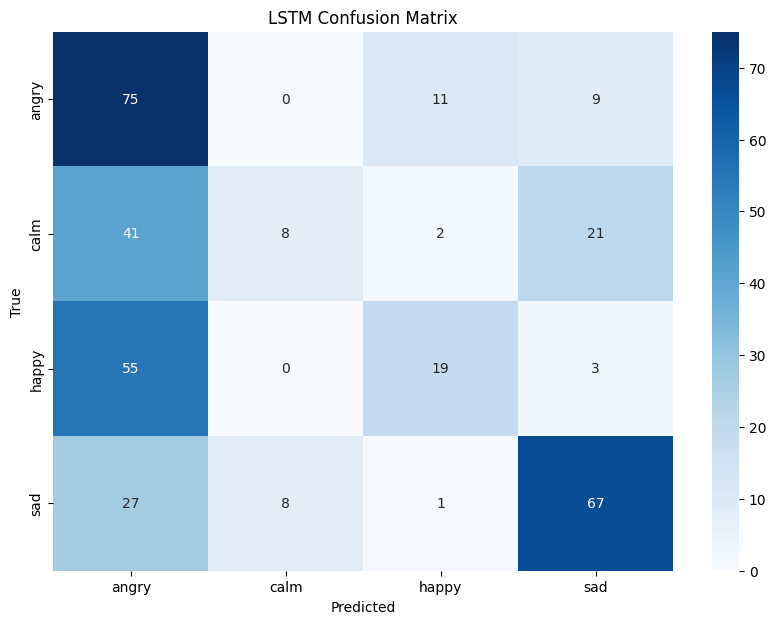

LSTM Model Classification Report:
              precision    recall  f1-score   support

       angry       0.38      0.79      0.51        95
        calm       0.50      0.11      0.18        72
       happy       0.58      0.25      0.35        77
         sad       0.67      0.65      0.66       103

    accuracy                           0.49       347
   macro avg       0.53      0.45      0.42       347
weighted avg       0.53      0.49      0.45       347



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# LSTM Model Performans Değerlendirme
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()

# Diğer performans metrikleri
print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=le.classes_))


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Flatten
from keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

embed_dim = 64
num_heads = 2
ff_dim = 32

inputs = Input(shape=(X_train.shape[1], 1))
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(inputs, training=True)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(le.classes_), activation='softmax')(x)

model_transformer = Model(inputs=inputs, outputs=outputs)

# Modeli derle
model_transformer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Veriyi yeniden şekillendirme
X_train_transformer = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_transformer = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modeli eğit
model_transformer.fit(X_train_transformer, y_train, epochs=50, validation_data=(X_test_transformer, y_test))


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.2808 - loss: 1.3857 - val_accuracy: 0.2968 - val_loss: 1.3845
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2548 - loss: 1.3841 - val_accuracy: 0.2738 - val_loss: 1.3833
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2839 - loss: 1.3817 - val_accuracy: 0.2968 - val_loss: 1.3821
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2524 - loss: 1.3821 - val_accuracy: 0.2738 - val_loss: 1.3815
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2965 - loss: 1.3798 - val_accuracy: 0.2738 - val_loss: 1.3808
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2709 - loss: 1.3792 - val_accuracy: 0.2738 - val_loss: 1.3808
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2835 - loss: 1.3802 - val_accuracy: 0.2738 - val_loss: 1.3804
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2680 - loss: 1.3785 - val_accuracy: 0.2738 - val

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


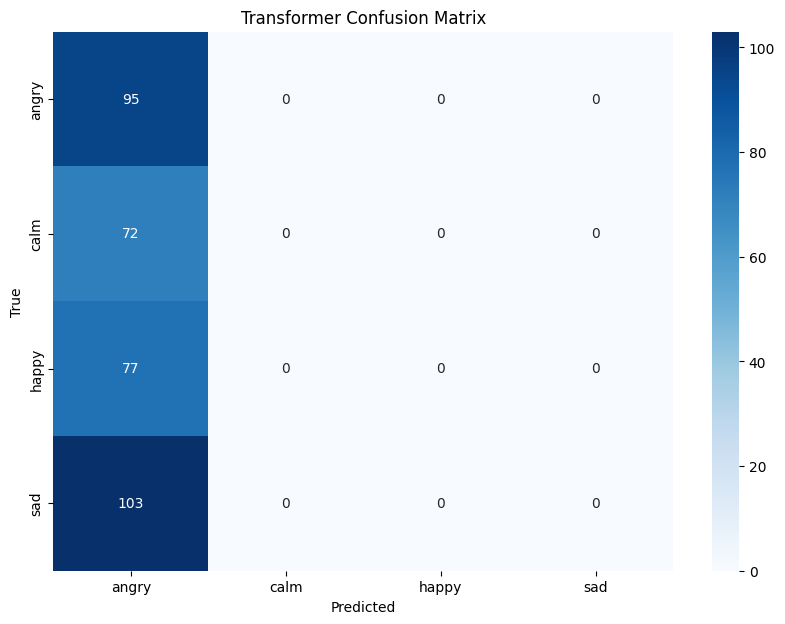

Transformer Model Classification Report:
              precision    recall  f1-score   support

       angry       0.27      1.00      0.43        95
        calm       0.00      0.00      0.00        72
       happy       0.00      0.00      0.00        77
         sad       0.00      0.00      0.00       103

    accuracy                           0.27       347
   macro avg       0.07      0.25      0.11       347
weighted avg       0.07      0.27      0.12       347



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Transformer Model Performans Değerlendirme
y_pred_transformer = model_transformer.predict(X_test_transformer)
y_pred_transformer = np.argmax(y_pred_transformer, axis=1)

# Confusion Matrix
cm_transformer = confusion_matrix(y_test, y_pred_transformer)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_transformer, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Transformer Confusion Matrix')
plt.show()

# Diğer performans metrikleri
print("Transformer Model Classification Report:")
print(classification_report(y_test, y_pred_transformer, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2777 - loss: 1.3787 - val_accuracy: 0.3487 - val_loss: 1.3491
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3824 - loss: 1.3260 - val_accuracy: 0.3948 - val_loss: 1.2830
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4097 - loss: 1.2483 - val_accuracy: 0.3948 - val_loss: 1.2655
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4087 - loss: 1.2301 - val_accuracy: 0.4179 - val_loss: 1.2492
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3997 - loss: 1.2195 - val_accuracy: 0.4179 - val_loss: 1.2323
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4229 - loss: 1.2058 - val_accuracy: 0.4150 - val_loss: 1.2463
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4277 - loss: 1.1865 - val_accuracy: 0.4150 - val_loss: 1.2262
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4452 - loss: 1.1852 - val_accuracy: 0.4150 - val_l

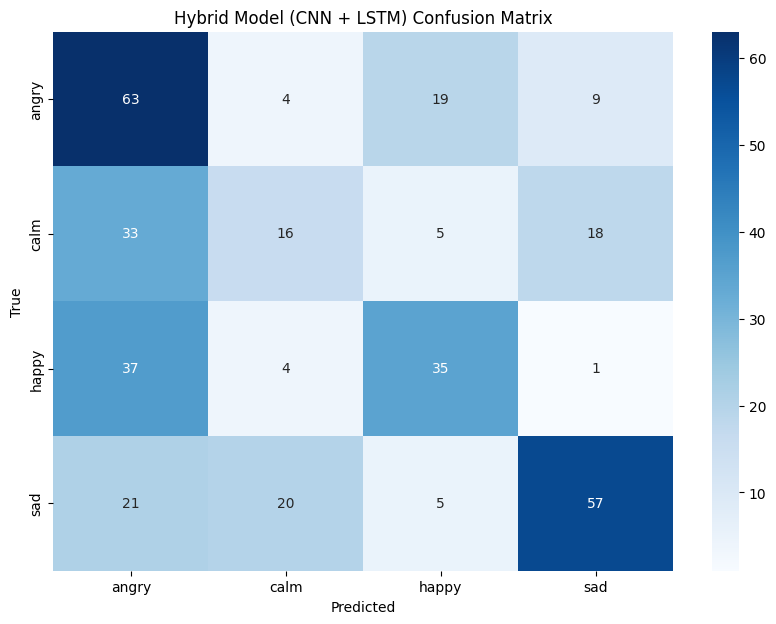

Hybrid Model (CNN + LSTM) Classification Report:
              precision    recall  f1-score   support

       angry       0.41      0.66      0.51        95
        calm       0.36      0.22      0.28        72
       happy       0.55      0.45      0.50        77
         sad       0.67      0.55      0.61       103

    accuracy                           0.49       347
   macro avg       0.50      0.47      0.47       347
weighted avg       0.51      0.49      0.49       347



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten

# Veriyi yeniden şekillendirin
X_train_hybrid = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_hybrid = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Hibrit Model (CNN + LSTM) oluştur
model_hybrid = Sequential()
model_hybrid.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_hybrid.add(MaxPooling1D(pool_size=2))
model_hybrid.add(LSTM(128))
model_hybrid.add(Dropout(0.5))
model_hybrid.add(Dense(len(le.classes_), activation='softmax'))

# Modeli derle
model_hybrid.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
model_hybrid.fit(X_train_hybrid, y_train, epochs=50, validation_data=(X_test_hybrid, y_test))

# Performans Değerlendirme
y_pred_hybrid = model_hybrid.predict(X_test_hybrid)
y_pred_hybrid = np.argmax(y_pred_hybrid, axis=1)

# Confusion Matrix
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Hybrid Model (CNN + LSTM) Confusion Matrix')
plt.show()

# Diğer performans metrikleri
print("Hybrid Model (CNN + LSTM) Classification Report:")
print(classification_report(y_test, y_pred_hybrid, target_names=le.classes_))


4. Adım: Özellik Analizi

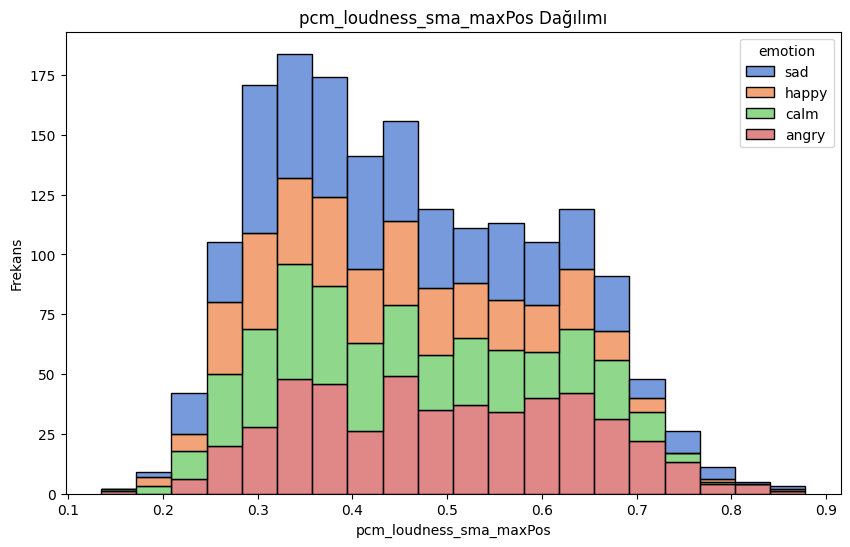

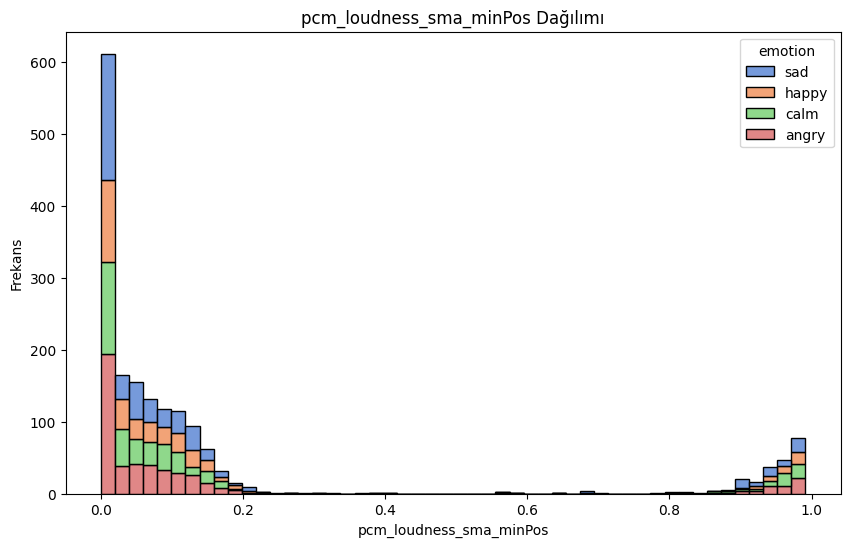

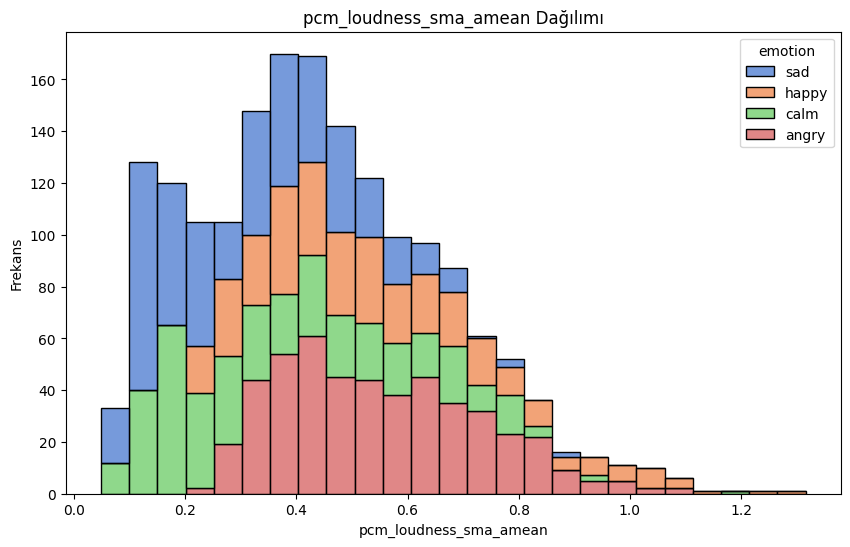

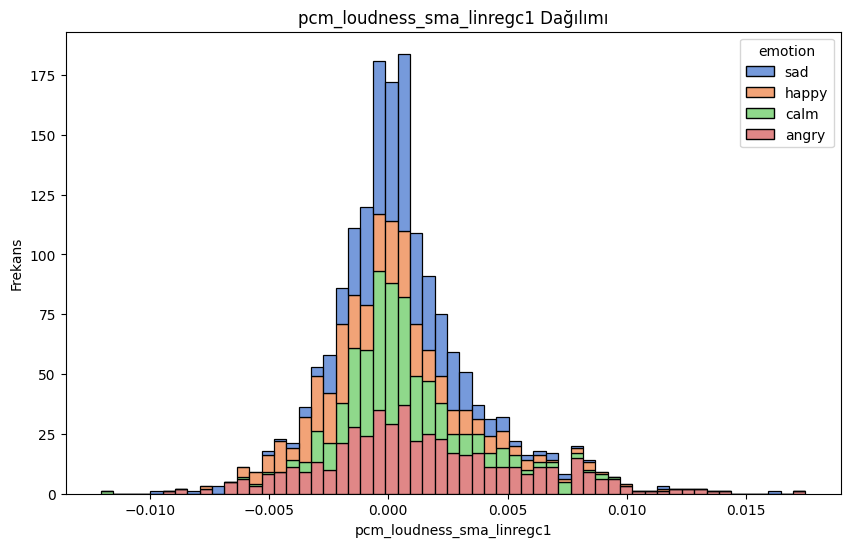

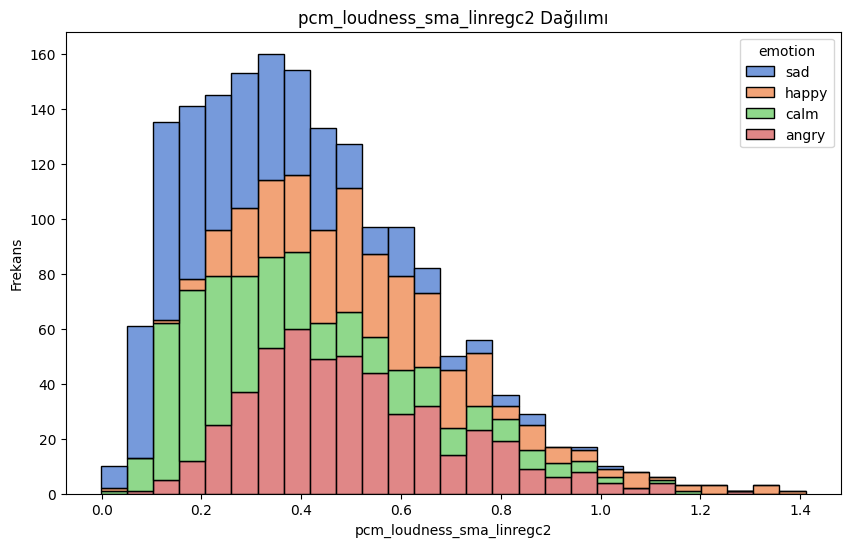

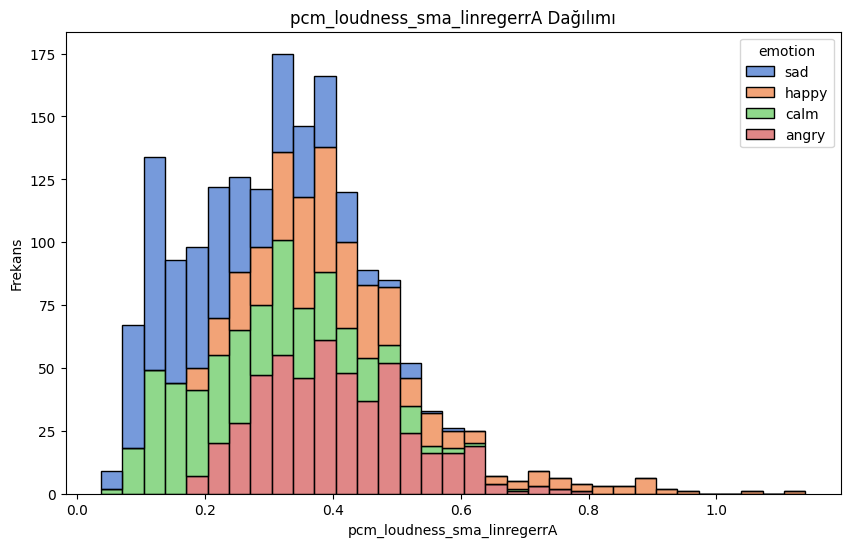

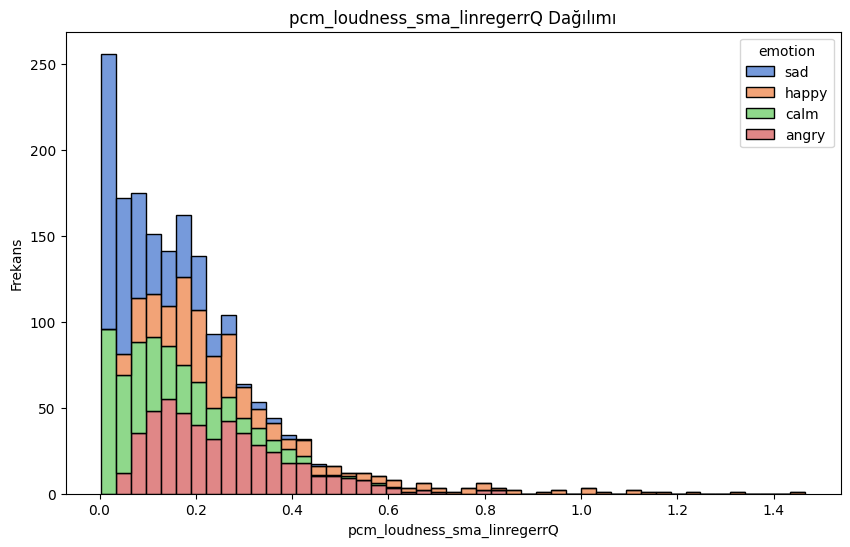

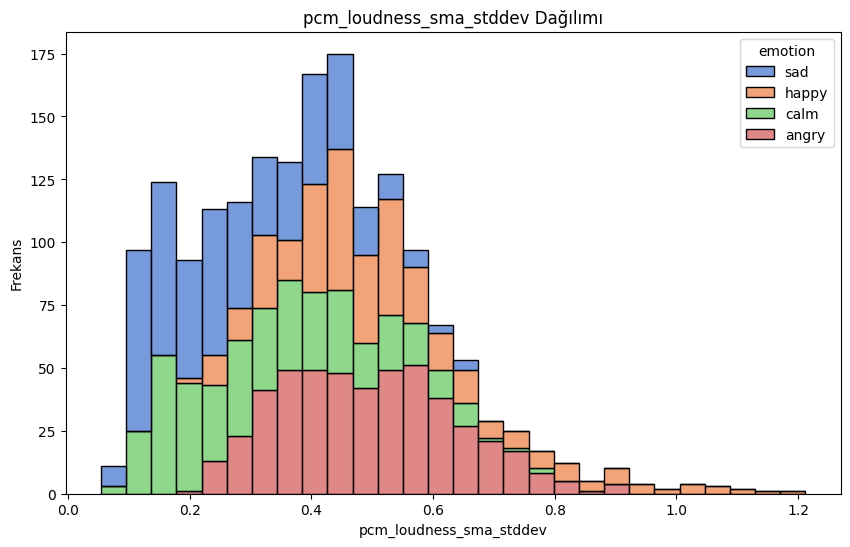

In [ ]:
# Veri setlerinin yüklenmesi
datasets = {
    'sad': '/sad.csv',
    'happy': '/happy.csv',
    'calm': '/calm.csv',
    'angry': '/angry.csv'
}

# Veri setlerini birleştirme
df_list = []
for emotion, file_path in datasets.items():
    df = pd.read_csv(file_path)
    df['emotion'] = emotion
    df_list.append(df)
df = pd.concat(df_list)

# Özelliklerin dağılımını incelemek için histogramlar çizelim
features = ['pcm_loudness_sma_maxPos', 'pcm_loudness_sma_minPos', 'pcm_loudness_sma_amean',
            'pcm_loudness_sma_linregc1', 'pcm_loudness_sma_linregc2', 'pcm_loudness_sma_linregerrA',
            'pcm_loudness_sma_linregerrQ', 'pcm_loudness_sma_stddev']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='emotion', multiple='stack', palette='muted')
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.show()


<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


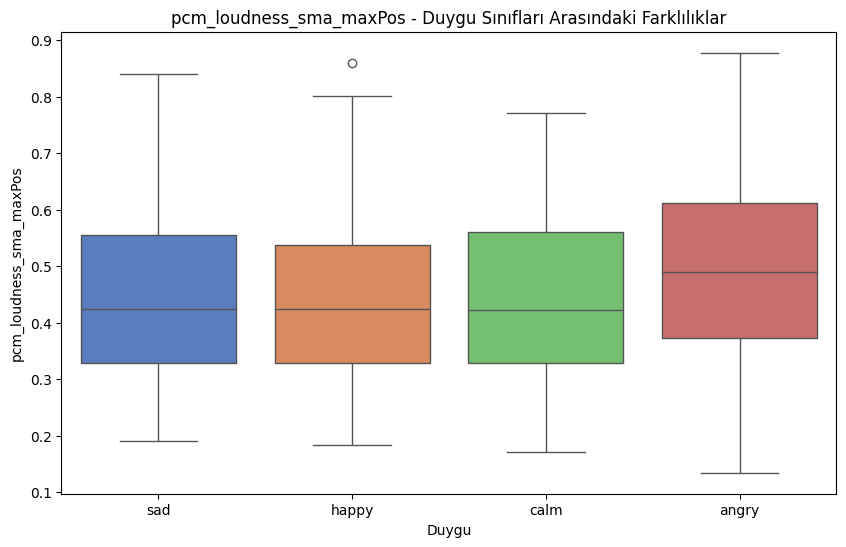

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


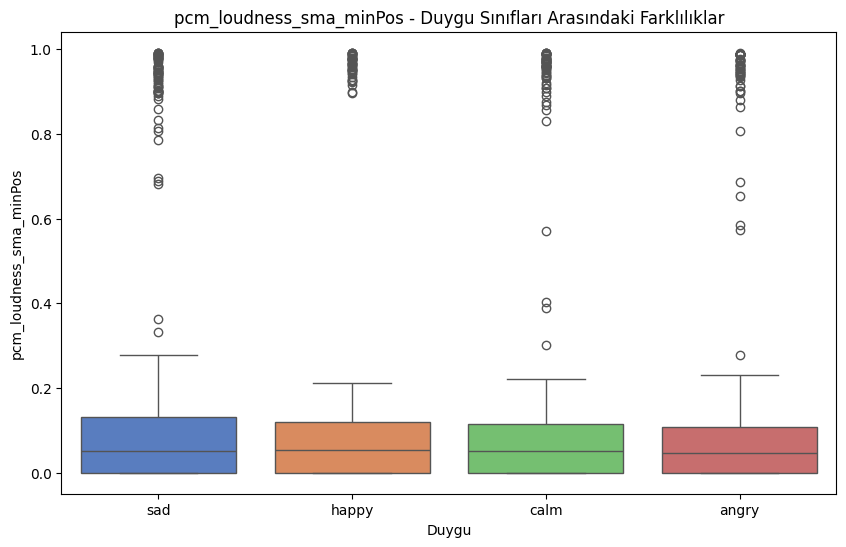

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


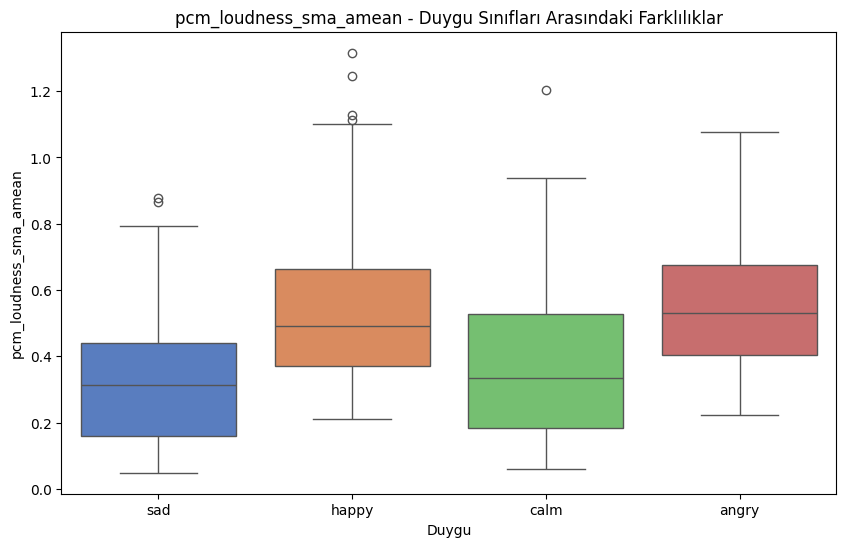

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


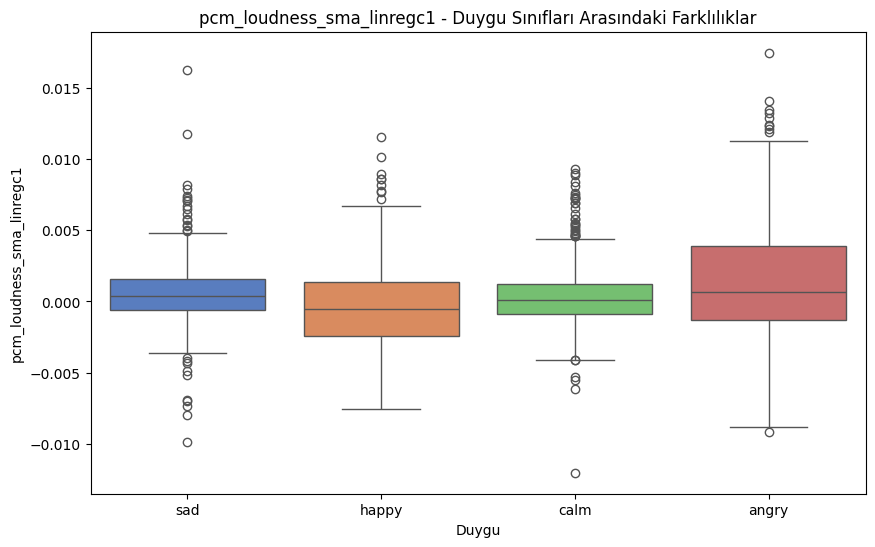

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


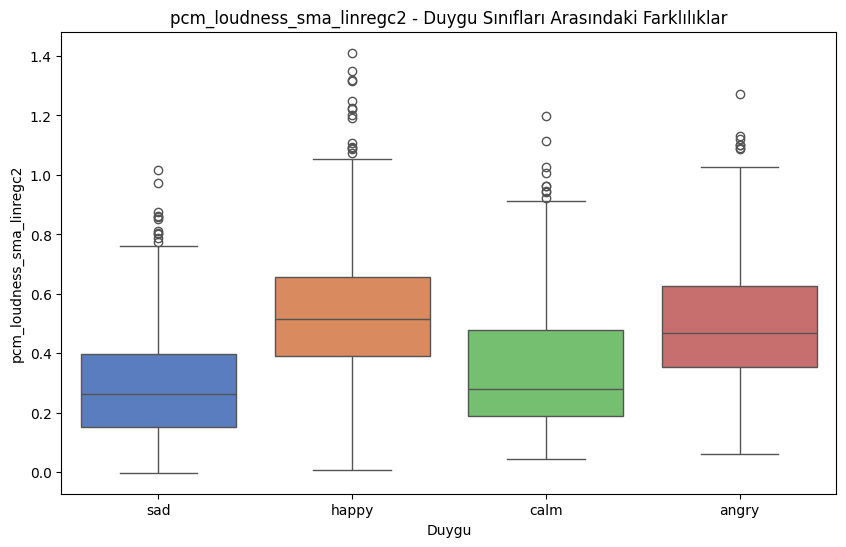

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


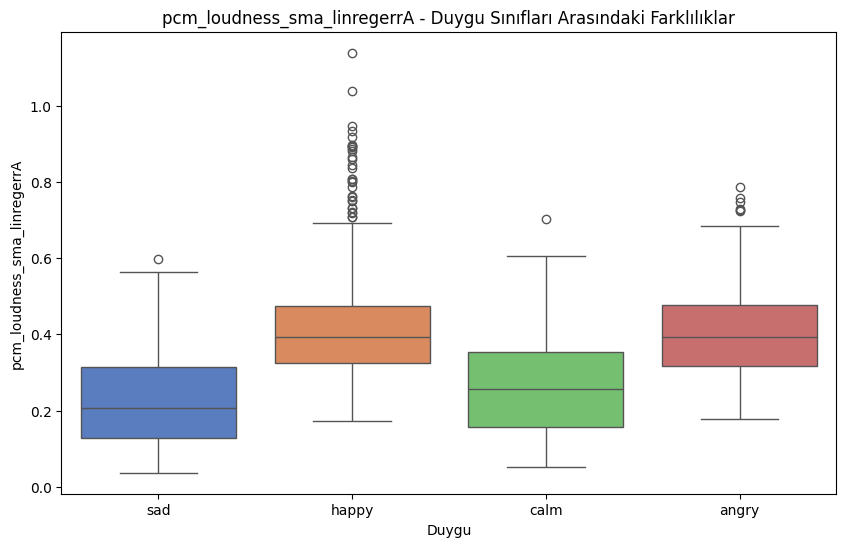

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


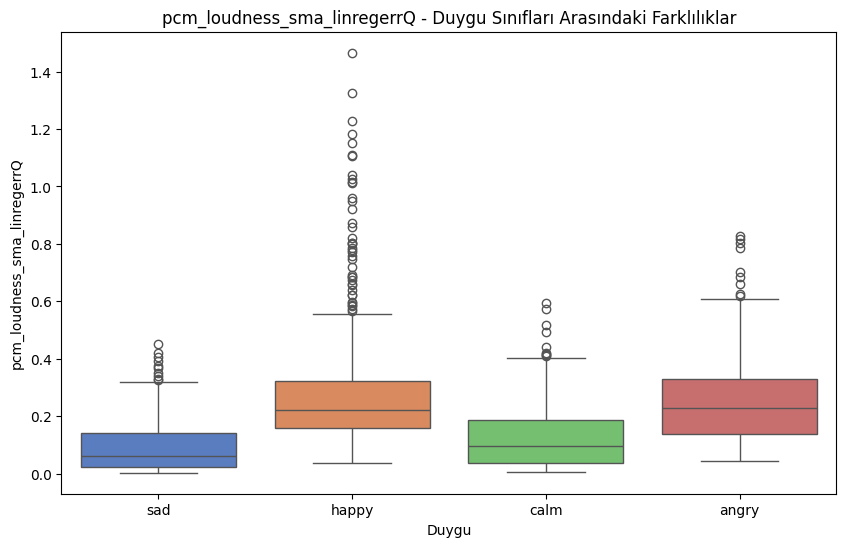

<ipython-input-27-024e39d4c55e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y=feature, data=df, palette='muted')


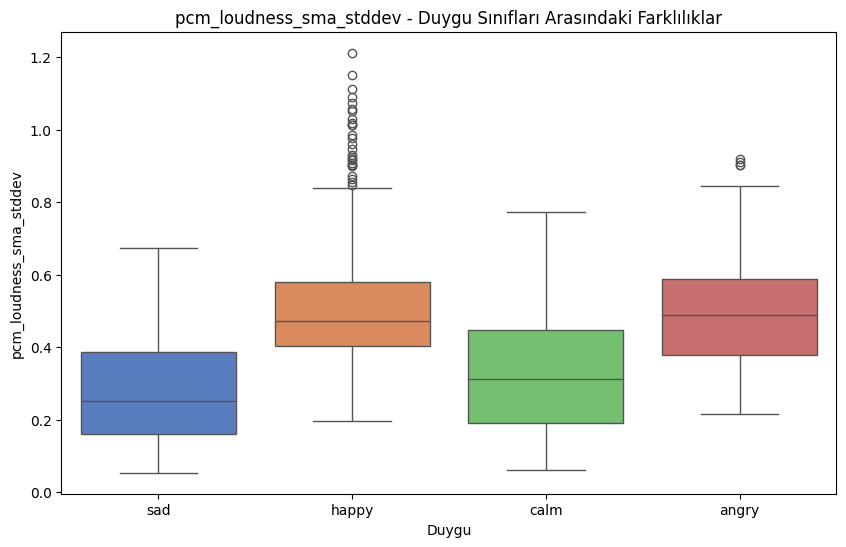

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y=feature, data=df, palette='muted')
    plt.title(f'{feature} - Duygu Sınıfları Arasındaki Farklılıklar')
    plt.xlabel('Duygu')
    plt.ylabel(feature)
    plt.show()


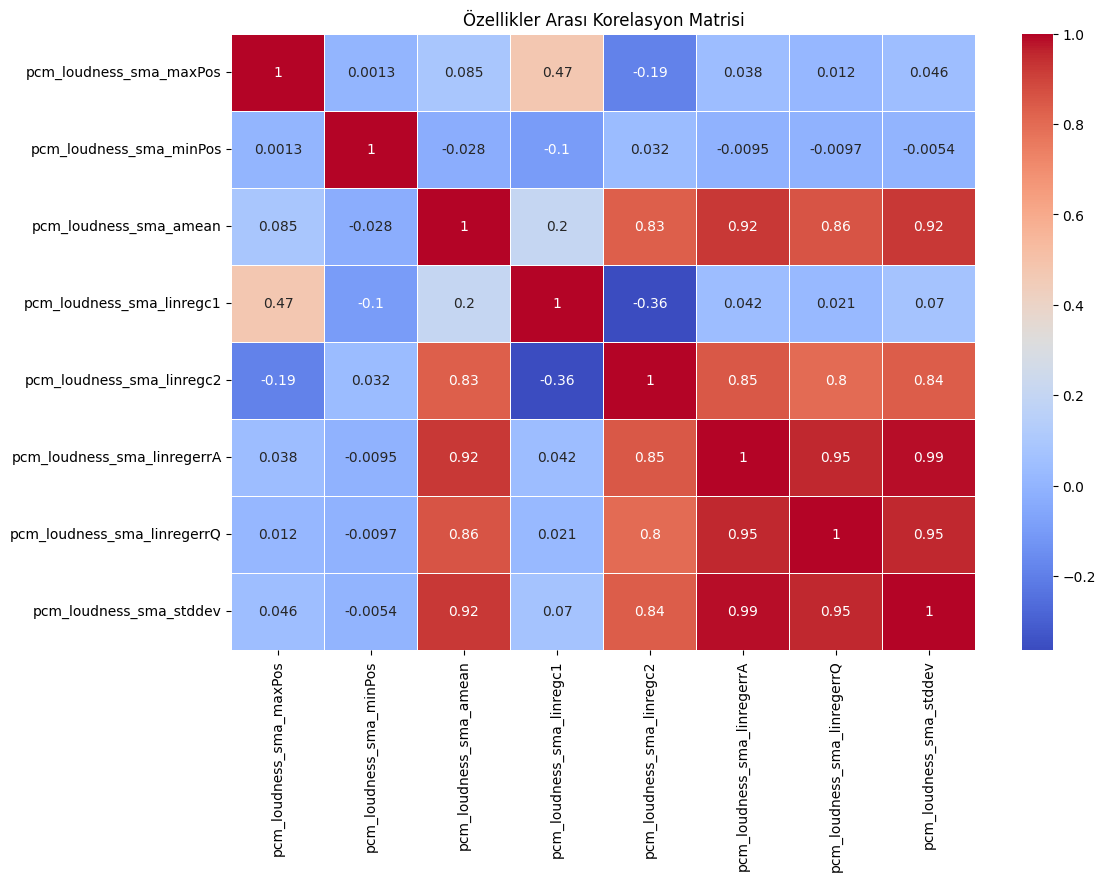

In [ ]:
# Korelasyon matrisinin hesaplanması
corr_matrix = df[features].corr()

# Korelasyon matrisinin görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()


5. Adım: Performans Metrikleri


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


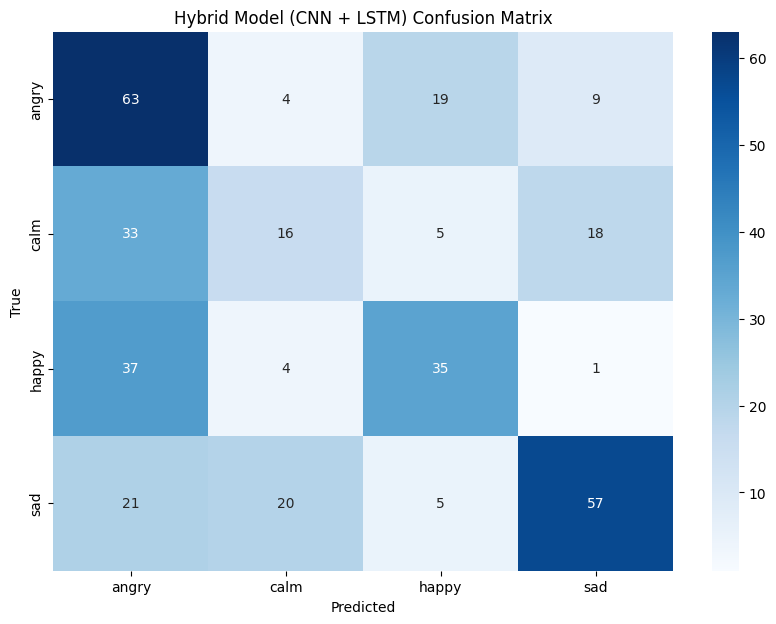

Hybrid Model (CNN + LSTM) Classification Report:
              precision    recall  f1-score   support

       angry       0.41      0.66      0.51        95
        calm       0.36      0.22      0.28        72
       happy       0.55      0.45      0.50        77
         sad       0.67      0.55      0.61       103

    accuracy                           0.49       347
   macro avg       0.50      0.47      0.47       347
weighted avg       0.51      0.49      0.49       347



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Hibrit model tahminleri (en son eğittiğimiz model)
y_pred_hybrid = model_hybrid.predict(X_test_hybrid)
y_pred_hybrid = np.argmax(y_pred_hybrid, axis=1)

# Confusion Matrix
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Hybrid Model (CNN + LSTM) Confusion Matrix')
plt.show()

# Diğer performans metrikleri
print("Hybrid Model (CNN + LSTM) Classification Report:")
print(classification_report(y_test, y_pred_hybrid, target_names=le.classes_))


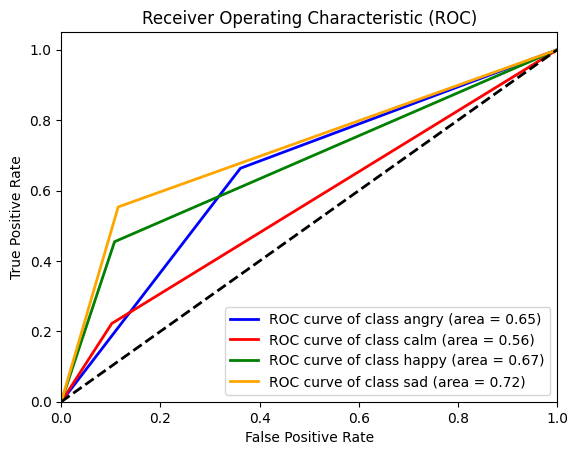

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Etiketleri binarize etmek (one-hot encode)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Tahminleri binarize etmek
y_pred_binarized = label_binarize(y_pred_hybrid, classes=[0, 1, 2, 3])

# ROC eğrileri için her sınıfın ROC eğrisini çiz
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC eğrilerini çizme
plt.figure()
colors = ['blue', 'red', 'green', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


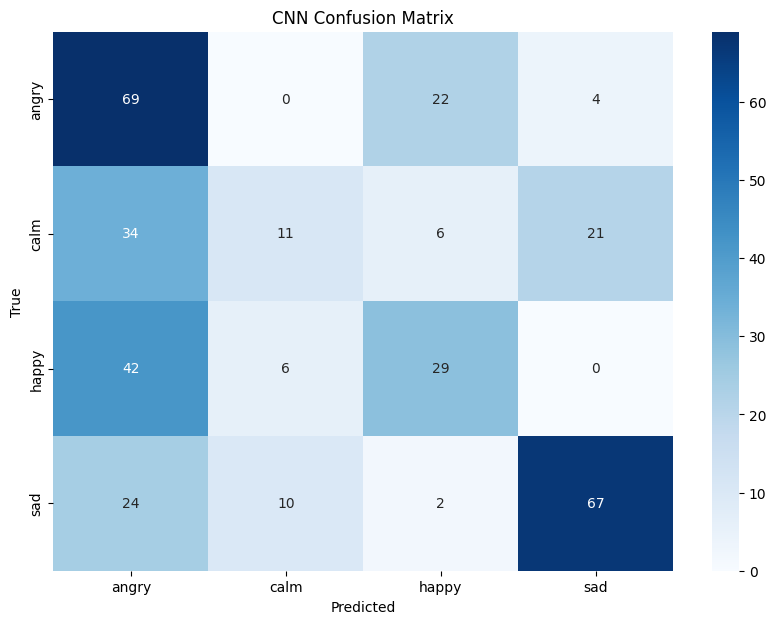

CNN Classification Report:
              precision    recall  f1-score   support

       angry       0.41      0.73      0.52        95
        calm       0.41      0.15      0.22        72
       happy       0.49      0.38      0.43        77
         sad       0.73      0.65      0.69       103

    accuracy                           0.51       347
   macro avg       0.51      0.48      0.46       347
weighted avg       0.52      0.51      0.49       347



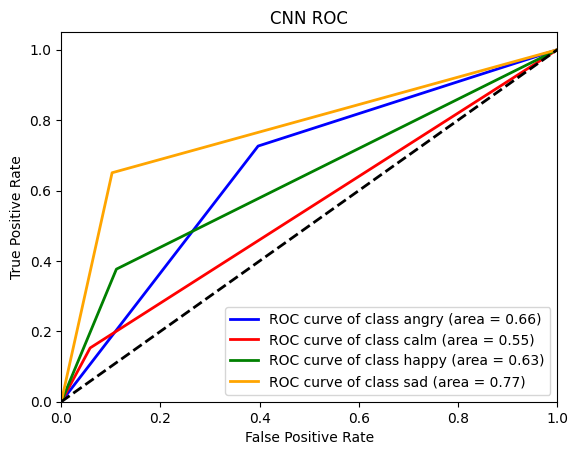

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


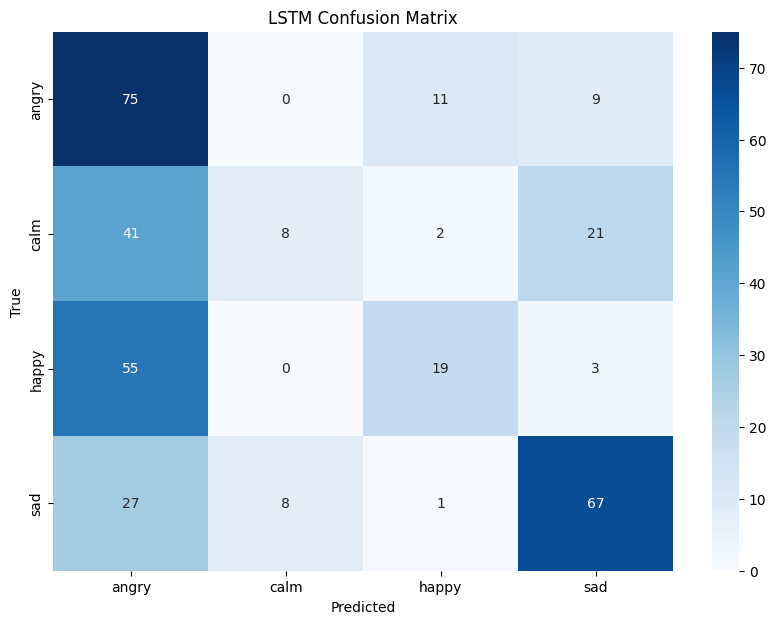

LSTM Classification Report:
              precision    recall  f1-score   support

       angry       0.38      0.79      0.51        95
        calm       0.50      0.11      0.18        72
       happy       0.58      0.25      0.35        77
         sad       0.67      0.65      0.66       103

    accuracy                           0.49       347
   macro avg       0.53      0.45      0.42       347
weighted avg       0.53      0.49      0.45       347



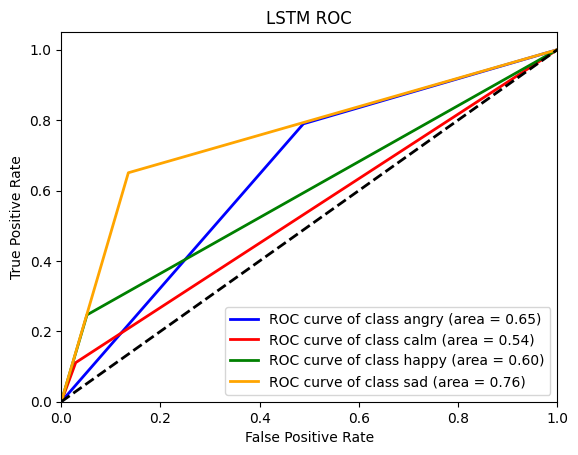

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


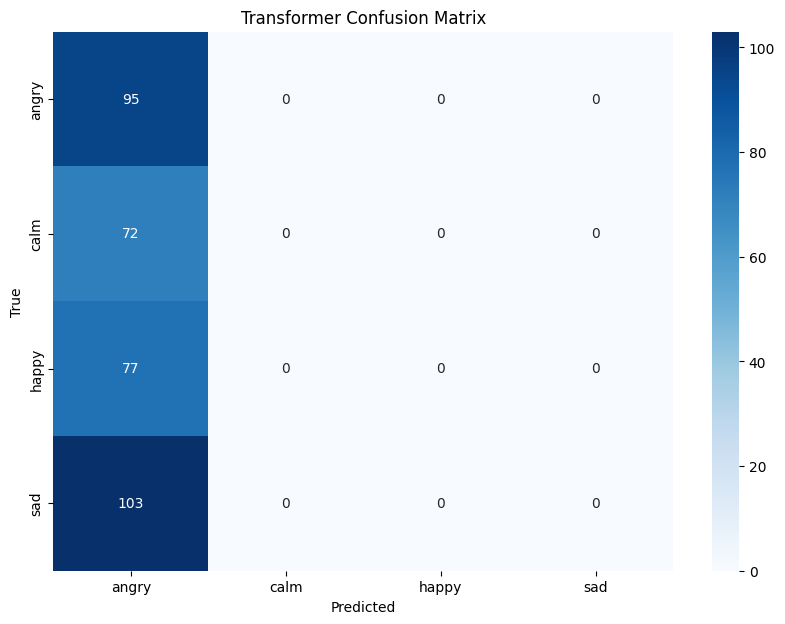

Transformer Classification Report:
              precision    recall  f1-score   support

       angry       0.27      1.00      0.43        95
        calm       0.00      0.00      0.00        72
       happy       0.00      0.00      0.00        77
         sad       0.00      0.00      0.00       103

    accuracy                           0.27       347
   macro avg       0.07      0.25      0.11       347
weighted avg       0.07      0.27      0.12       347



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


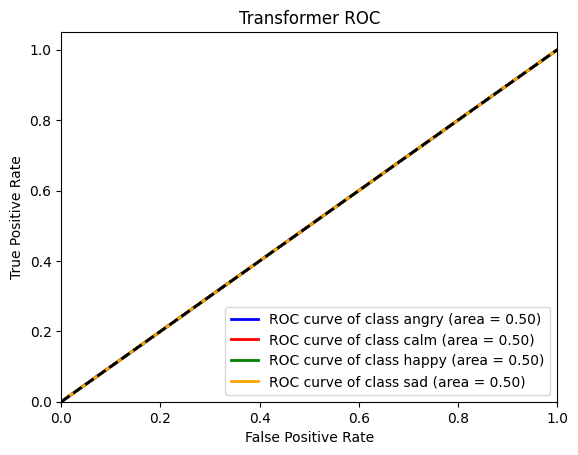

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


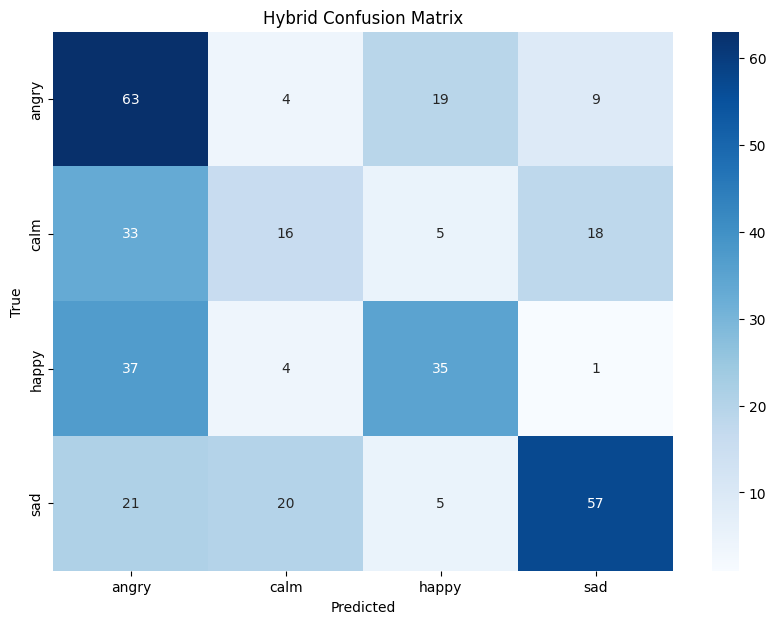

Hybrid Classification Report:
              precision    recall  f1-score   support

       angry       0.41      0.66      0.51        95
        calm       0.36      0.22      0.28        72
       happy       0.55      0.45      0.50        77
         sad       0.67      0.55      0.61       103

    accuracy                           0.49       347
   macro avg       0.50      0.47      0.47       347
weighted avg       0.51      0.49      0.49       347



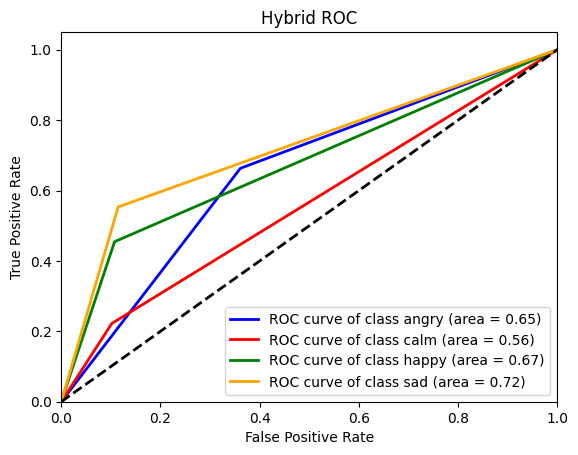

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

# Performans metrikleri hesaplama ve görselleştirme
models = {'CNN': model_cnn, 'LSTM': model_lstm, 'Transformer': model_transformer, 'Hybrid': model_hybrid}

for model_name, model in models.items():
    y_pred = model.predict(X_test_hybrid)
    y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # ROC eğrileri
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
    y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2, 3])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    for i, color in enumerate(colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC')
    plt.legend(loc="lower right")
    plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


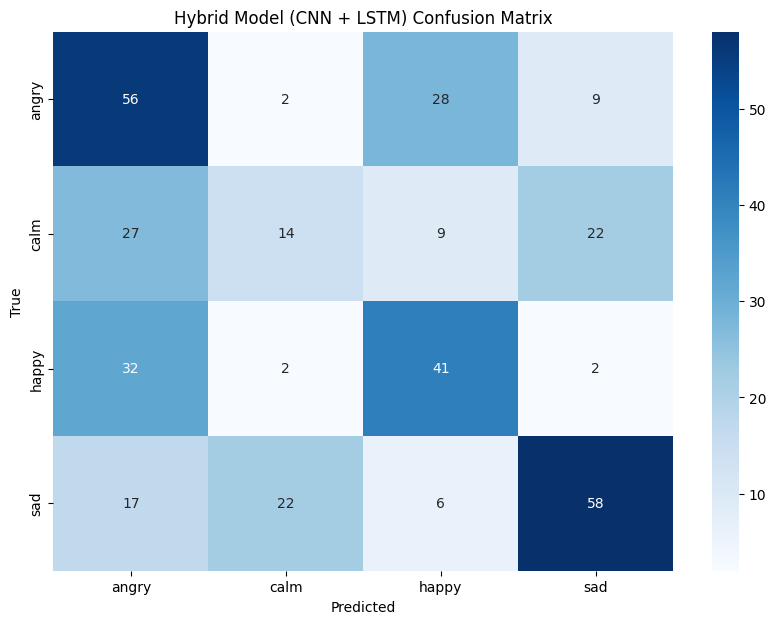

Hybrid Model (CNN + LSTM) Classification Report:
              precision    recall  f1-score   support

       angry       0.42      0.59      0.49        95
        calm       0.35      0.19      0.25        72
       happy       0.49      0.53      0.51        77
         sad       0.64      0.56      0.60       103

    accuracy                           0.49       347
   macro avg       0.47      0.47      0.46       347
weighted avg       0.49      0.49      0.48       347



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Son model performansını değerlendirme
y_pred_hybrid = model_hybrid.predict(X_test_hybrid)
y_pred_hybrid = np.argmax(y_pred_hybrid, axis=1)

cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Hybrid Model (CNN + LSTM) Confusion Matrix')
plt.show()

print("Hybrid Model (CNN + LSTM) Classification Report:")
print(classification_report(y_test, y_pred_hybrid, target_names=le.classes_))


In [ ]:
import pandas as pd
import numpy as np
import librosa

# Özellik çıkarma fonksiyonu
def extract_features(file_path):
    audio, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr)
    features = np.concatenate([np.mean(mfcc, axis=1), np.mean(chroma, axis=1),
                               np.mean(mel, axis=1), np.mean(contrast, axis=1),
                               np.mean(tonnetz, axis=1)])
    return features


In [ ]:
datasets = {
    'sad': '/sad.csv',
    'happy': '/happy.csv',
    'calm': '/calm.csv',
    'angry': '/angry.csv'
}

X = []
y = []

# CSV dosyalarından veri yükleme ve özellik çıkarma
for emotion, file_path in datasets.items():
    df = pd.read_csv(file_path)
    for index, row in df.iterrows():
        features = row.drop('name').values  # 'name' sütunu dışındaki tüm özellikleri alıyoruz
        X.append(features)
        y.append(emotion)

X = np.array(X)
y = np.array(y)

# Özellik isimleri
feature_names = list(df.columns)
feature_names.remove('name')

# Veri çerçevesi oluşturma
features_df = pd.DataFrame(X, columns=feature_names)
features_df['emotion'] = y

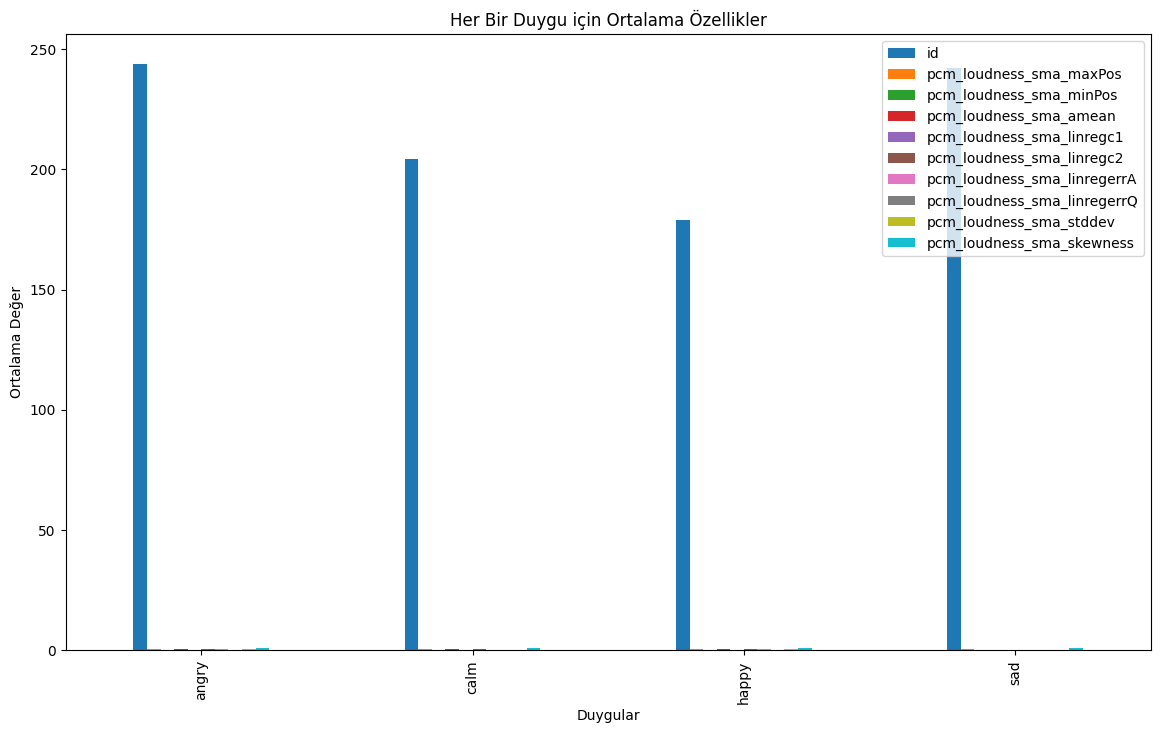

emotion                               angry      calm     happy       sad
id                                    244.0     204.5     179.0     242.0
pcm_loudness_sma_maxPos            0.495459  0.446611  0.438491   0.44646
pcm_loudness_sma_minPos            0.147959  0.176167  0.158663  0.177271
pcm_loudness_sma_amean             0.549279  0.373689  0.535074  0.315748
pcm_loudness_sma_linregc1          0.001391  0.000429  -0.00027  0.000544
...                                     ...       ...       ...       ...
shimmerLocal_sma_de_upleveltime75  0.101562  0.091766   0.08555  0.103599
shimmerLocal_sma_de_upleveltime90    0.0393  0.036919  0.037496  0.041925
F0final__Turn_numOnsets            3.470226  3.612745  3.308123  3.043478
F0final__Turn_duration                 0.87   0.91277  0.912297  0.898509
class                                   0.0       0.0       0.0       0.0

[1584 rows x 4 columns]


In [ ]:
# Her bir duygunun ortalama özelliklerini hesaplama
mean_features = features_df.groupby('emotion').mean()

# İlk 10 özelliği için ortalamaları görselleştirme
mean_features.iloc[:, :10].plot(kind='bar', figsize=(14, 8))
plt.title('Her Bir Duygu için Ortalama Özellikler')
plt.xlabel('Duygular')
plt.ylabel('Ortalama Değer')
plt.show()

# Önemli özellikleri yazdırma
print(mean_features.T)
